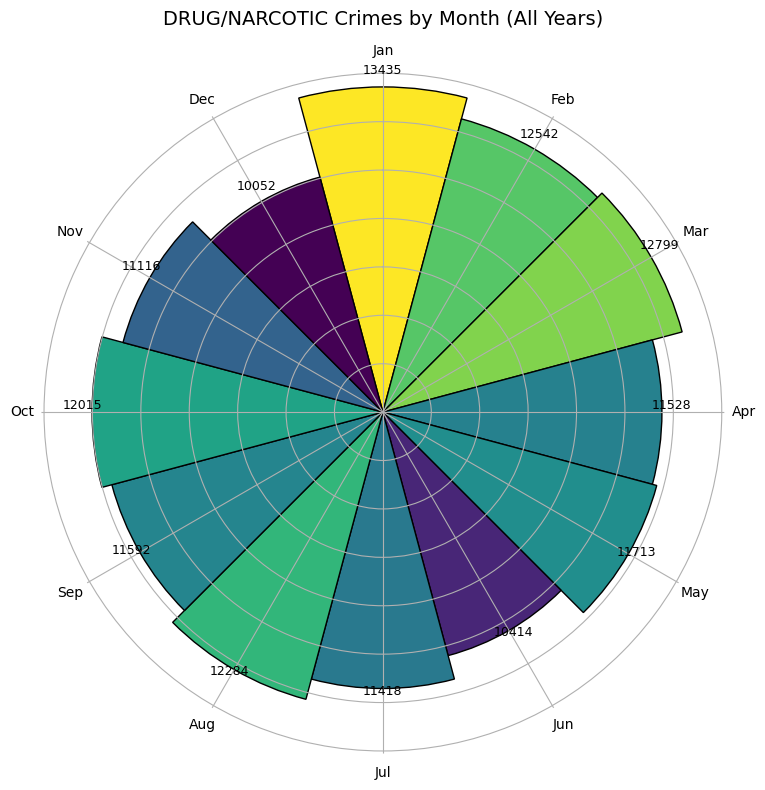

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import matplotlib

df = pd.read_csv("merged_data.csv")

df = df[df["Category"] == "DRUG/NARCOTIC"]

month_to_num = {month: index for index, month in enumerate(calendar.month_name) if month}
df["Month"] = df["Month"].map(month_to_num).astype("Int64")

month_counts = df["Month"].value_counts().sort_index()
months = np.arange(1, 13)
counts = np.array([month_counts.get(m, 0) for m in months])

theta = 2 * np.pi * (months - 1) / 12
month_labels = list(calendar.month_abbr)[1:]

norm = plt.Normalize(counts.min(), counts.max())
cmap = matplotlib.colormaps.get_cmap("viridis")
colors = cmap(norm(counts))

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, counts, width=2*np.pi/12, bottom=0, color=colors, edgecolor='black')

for i in range(len(counts)):
    ax.text(theta[i], counts[i] + 400, str(counts[i]), ha='center', va='bottom', fontsize=9)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(theta)
ax.set_xticklabels(month_labels, fontsize=10)
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)

plt.title("DRUG/NARCOTIC Crimes by Month (All Years)", va='bottom', fontsize=14, pad=30)

plt.tight_layout()
plt.show()
